C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_5664\2687176100.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Missing values:
 Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


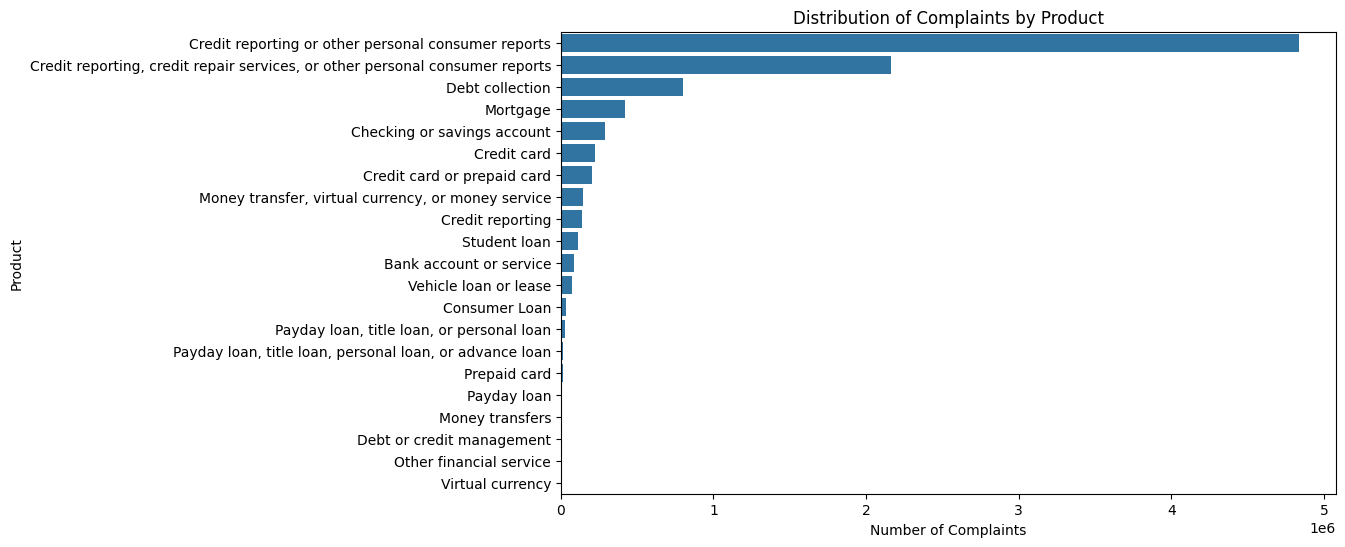

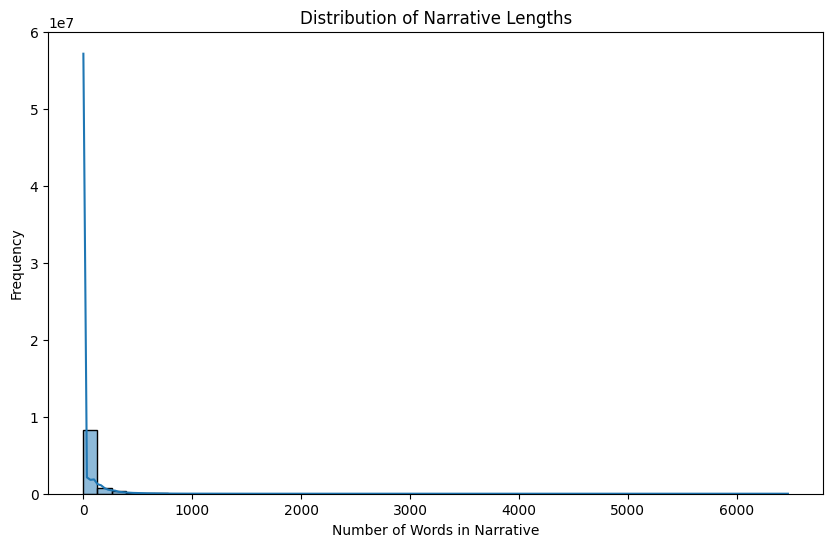

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../complaints/complaints.csv'  
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# EDA: Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# EDA: Distribution of complaints across products
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()

# Calculate and visualize the length of consumer complaint narratives
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Number of Words in Narrative')
plt.ylabel('Frequency')
plt.show()

# Filter for specified products and clean the data
products_to_include = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfers']
filtered_df = df[df['Product'].isin(products_to_include)]

# Remove records with empty narratives
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notna()]

# Clean the narratives (lowercasing and removing special characters)
filtered_df['Consumer complaint narrative'] = filtered_df['Consumer complaint narrative'].str.lower()
filtered_df['Consumer complaint narrative'] = filtered_df['Consumer complaint narrative'].str.replace(r'\W', ' ', regex=True)

# Save the cleaned and filtered dataset
filtered_df.to_csv('../filtered_complaints/filtered_complaints.csv', index=False)